In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(
    '../data/raw/winemag-data-130k-v2.csv',
    usecols=(
        'points',
        'price',
        'country',
        'taster_name',
        'description',
    ),
)
df

,country,description,points,price,taster_name
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt
...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Anna Lee C. Iijima
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Paul Gregutt
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Roger Voss
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Roger Voss


In [3]:
df = df.dropna()
df.shape

(96420, 5)

In [4]:
df = df.drop_duplicates()
df.shape

(88261, 5)

In [5]:
def points2group(row):
    """
    Convert points to it's group according to WineMag
    """
    if 80 <= row['points'] <= 82:
        return '80-82'
    if 83 <= row['points'] <= 86:
        return '83-86'
    if 87 <= row['points'] <= 89:
        return '87-89'
    if 90 <= row['points'] <= 93:
        return '90-93'
    if 94 <= row['points'] <= 97:
        return '94-97'
    if 98 <= row['points'] <= 100:
        return '98-100'
    return 'UNKNOWN'

df['points_group'] = df.apply(points2group, axis=1)

In [6]:
train_df, test_df = train_test_split(df, random_state=42, test_size=0.2)

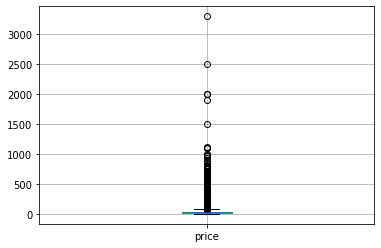

In [7]:
train_df.boxplot(column='price')
plt.show()

In [8]:
train_df = train_df[np.abs(zscore(train_df['price'])) < 3]
train_df.shape

(69912, 6)

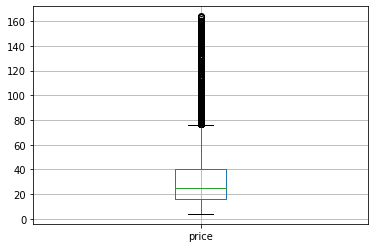

In [9]:
train_df.boxplot(column='price')
plt.show()

In [10]:
print('Train size:', train_df.shape)
print('Test size:', test_df.shape)

Train size: (69912, 6)
Test size: (17653, 6)


In [11]:
train_df.to_csv('../data/cleaned/train.csv')
test_df.to_csv('../data/cleaned/test.csv')
